In [1]:
import sys
import os

current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.insert(0, project_root)

from models.model_structures import M5

In [2]:
import torch
from torchvision import datasets, transforms
import numpy as np
from tqdm import tqdm

from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

learning_rate = 0.001
training_epochs = 30
batch_size = 32

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root=project_root + '/Data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root=project_root + '/Data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

print("train dataset:", train_dataset.data.shape)
print("test dataset :", test_dataset.data.shape)

Files already downloaded and verified
Files already downloaded and verified
train dataset: (50000, 32, 32, 3)
test dataset : (10000, 32, 32, 3)


In [3]:
def train(model, train_loader, optimizer):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (image, label) in enumerate(tqdm(train_loader)):
        image = image.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        hypothesis = model(image)
        loss = criterion(hypothesis, label)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        _, predicted = hypothesis.max(1)
        total += label.size(0)
        correct += predicted.eq(label).sum().item()

    accuracy = correct / total

    return train_loss / len(train_loader), accuracy

def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(device)
            label = label.to(device)

            output = model(image)
            loss = criterion(output, label)
            test_loss += loss.item()

            _, predicted = output.max(1)
            total += label.size(0)
            correct += predicted.eq(label).sum().item()

    test_accuracy = correct / total
    return test_loss / len(test_loader), test_accuracy

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [04:18<00:00,  6.05it/s]


Epoch: 1/30.. Training loss: 1.811026.. Test loss: 1.571406.. Test Accuracy: 0.419671


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:30<00:00, 50.91it/s]


Epoch: 2/30.. Training loss: 1.488710.. Test loss: 1.438244.. Test Accuracy: 0.479768


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 60.93it/s]


Epoch: 3/30.. Training loss: 1.349906.. Test loss: 1.320765.. Test Accuracy: 0.531450


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:26<00:00, 59.77it/s]


Epoch: 4/30.. Training loss: 1.253687.. Test loss: 1.201992.. Test Accuracy: 0.569712


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 62.33it/s]


Epoch: 5/30.. Training loss: 1.160561.. Test loss: 1.215780.. Test Accuracy: 0.571615


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:27<00:00, 57.37it/s]


Epoch: 6/30.. Training loss: 1.096163.. Test loss: 1.214446.. Test Accuracy: 0.593550


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:26<00:00, 58.74it/s]


Epoch: 7/30.. Training loss: 1.060996.. Test loss: 1.125599.. Test Accuracy: 0.617488


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:28<00:00, 53.99it/s]


Epoch: 8/30.. Training loss: 1.003204.. Test loss: 1.082278.. Test Accuracy: 0.626402


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:26<00:00, 59.41it/s]


Epoch: 9/30.. Training loss: 0.970052.. Test loss: 1.017747.. Test Accuracy: 0.655148


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 61.02it/s]


Epoch:10/30.. Training loss: 0.961435.. Test loss: 1.050939.. Test Accuracy: 0.640625


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:27<00:00, 56.85it/s]


Epoch:11/30.. Training loss: 0.904145.. Test loss: 1.105072.. Test Accuracy: 0.622997


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:26<00:00, 59.27it/s]


Epoch:12/30.. Training loss: 0.878104.. Test loss: 1.047695.. Test Accuracy: 0.664163


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 60.31it/s]


Epoch:13/30.. Training loss: 0.850831.. Test loss: 1.016116.. Test Accuracy: 0.678786


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:27<00:00, 55.95it/s]


Epoch:14/30.. Training loss: 0.845919.. Test loss: 0.943658.. Test Accuracy: 0.693510


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 62.04it/s]


Epoch:15/30.. Training loss: 0.811316.. Test loss: 0.985825.. Test Accuracy: 0.689203


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 61.55it/s]


Epoch:16/30.. Training loss: 0.796633.. Test loss: 0.940678.. Test Accuracy: 0.705429


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 62.28it/s]


Epoch:17/30.. Training loss: 0.778356.. Test loss: 0.966295.. Test Accuracy: 0.691006


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 61.19it/s]


Epoch:18/30.. Training loss: 0.742361.. Test loss: 0.958576.. Test Accuracy: 0.696815


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:24<00:00, 62.91it/s]


Epoch:19/30.. Training loss: 0.730326.. Test loss: 0.954630.. Test Accuracy: 0.701522


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 62.43it/s]


Epoch:20/30.. Training loss: 0.709135.. Test loss: 1.043638.. Test Accuracy: 0.694712


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 61.76it/s]


Epoch:21/30.. Training loss: 0.723463.. Test loss: 0.965957.. Test Accuracy: 0.697917


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 61.64it/s]


Epoch:22/30.. Training loss: 0.695925.. Test loss: 0.971405.. Test Accuracy: 0.704227


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 61.76it/s]


Epoch:23/30.. Training loss: 0.668773.. Test loss: 0.939100.. Test Accuracy: 0.710837


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 61.68it/s]


Epoch:24/30.. Training loss: 0.650060.. Test loss: 1.050808.. Test Accuracy: 0.707232


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 61.65it/s]


Epoch:25/30.. Training loss: 0.668630.. Test loss: 0.962730.. Test Accuracy: 0.705829


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 60.89it/s]


Epoch:26/30.. Training loss: 0.653028.. Test loss: 0.975147.. Test Accuracy: 0.724159


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 62.32it/s]


Epoch:27/30.. Training loss: 0.623446.. Test loss: 0.948291.. Test Accuracy: 0.724960


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 61.61it/s]


Epoch:28/30.. Training loss: 0.633412.. Test loss: 0.935449.. Test Accuracy: 0.723157


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 62.03it/s]


Epoch:29/30.. Training loss: 0.660877.. Test loss: 1.019157.. Test Accuracy: 0.726663


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:25<00:00, 61.43it/s]


Epoch:30/30.. Training loss: 0.643981.. Test loss: 0.957649.. Test Accuracy: 0.728265


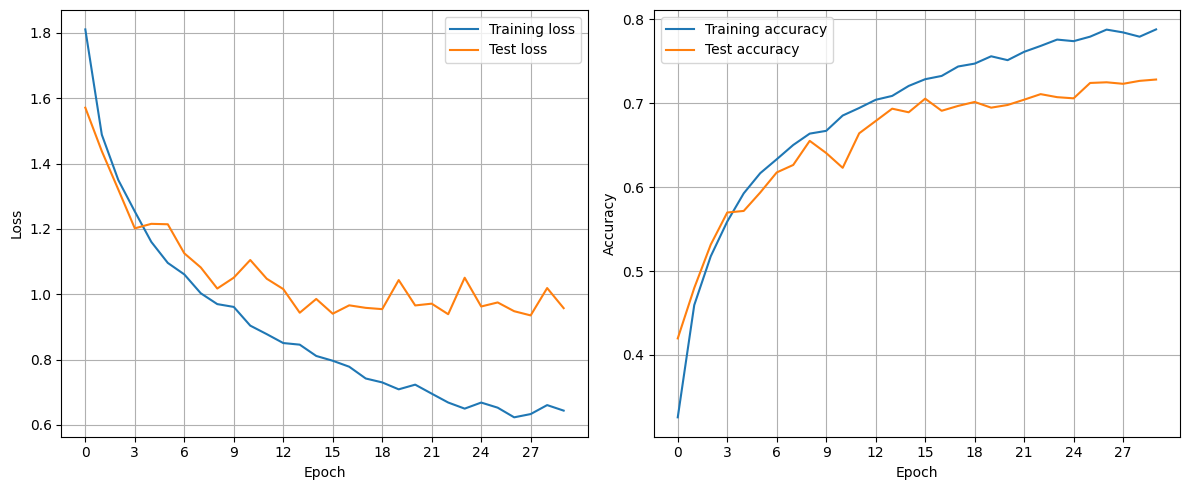

In [4]:
# Model creation
model = M5().to(device)
# Setting up loss function and optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# loss and accuracy value list
loss_keeper = {'train':[], 'test':[]}
accuracy_keeper = {'train': [], 'test': []}

for epoch in range(training_epochs):
    '''
    Training phase
    '''
    train_loss, train_accuracy = train(model, train_loader, optimizer)
    loss_keeper['train'].append(train_loss)
    accuracy_keeper['train'].append(train_accuracy)
    
    '''
    Test phase
    '''
    test_loss, test_accuracy = evaluate(model, test_loader)
    loss_keeper['test'].append(test_loss)
    accuracy_keeper['test'].append(test_accuracy)

    print("Epoch:%2d/%2d.. Training loss: %f.. Test loss: %f.. Test Accuracy: %f" 
          %(epoch + 1, training_epochs, train_loss, test_loss, test_accuracy))
    
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_keeper['train'], label="Training loss")
plt.plot(loss_keeper['test'], label="Test loss")
plt.legend()
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(np.arange(0, training_epochs, step=3))

plt.subplot(1, 2, 2)
plt.plot(accuracy_keeper['train'], label="Training accuracy")
plt.plot(accuracy_keeper['test'], label="Test accuracy")
plt.legend()
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, training_epochs, step=3))

plt.tight_layout()
plt.show()

torch.save(model, project_root + '/models/M5_model.pth')

In [5]:
print(model)

M5(
  (Conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (Square1): Square()
  (AvgPool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (Conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(1, 1))
  (Square2): Square()
  (AvgPool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (Conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (Square3): Square()
  (AvgPool3): AvgPool2d(kernel_size=4, stride=4, padding=0)
  (Flatten): Flatten()
  (FC1): Linear(in_features=128, out_features=10, bias=True)
)
